<a href="https://colab.research.google.com/github/manuzioli/Alzheimer/blob/main/Progetto_Grazioli_Emmanuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Progetto Machine Learning Grazioli Emmanuel

Scrivere un google colab, ben documentato in cui si testano 
classificatori a scelta dello studente su un dataset chiamato 'Features Alzheimer'

Come intendere i dati di
Alzheimer Features For Analysis
Group is a target for models

Group --> Class   

Age --> Age

EDUC --> Years of Education

SES --> Socioeconomic Status / 1-5

MMSE --> Mini Mental State Examination

CDR --> Clinical Dementia Rating

eTIV --> Estimated total intracranial volume

nWBV --> Normalize Whole Brain Volume

ASF --> Atlas Scaling Factor

In [94]:
#Le prime operazioni da compiere sono il caricamento degli strumenti e dei dati.
#Come visto nell'esempio 'Iris' svolto in aula, mi rifarò agli stessi strumenti
#per la classificazione, manipolazione e visualizzazione dei dati.

# I dati consistono nella descrizione di 373 pazienti malati di Alzheimer.
#Ogni paziente,identificato tramite un ID, è descritto tramite parametri i più rilevanti sono:
# Gruppo
# Età
# Educazione (anni di educazione)
# Stato socioeconomico  (valori da 1 a 5)
# Mini esame dello stato mentale
# Rating clinico sulla demenza
# Volume intraacranico stimato
# Volume 'normale' dell'intero cervello 
# Fattore scalare di Atlas

#L'obiettivo di questo programma sarà poi quello di predirre il gruppo di una persona
#in base a tutte le altre sue caratteristiche.

# The version of python
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy 
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas 
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))

# il risultato di questo script non sarà poi così rilevante in quanto le versioni, le librerie
# ecc. vengono nel tempo aggiornate da utenti e moderatori.

Python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [95]:
# Come abbiamo imparato Python si basa interamente su ampie librerie, pre ediate da qualcun altro.
# Andiamole ad importare per poterle utilizzare all'interno del nostro porgamma
import pandas

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Abilito il plottaggio inline da matplotlib
%matplotlib inline
# Imposta alcuni stili per seaborn, operazione estetica
sns.set(style="white", color_codes=True)

In [96]:
# Ciò che ci importa adesso è caricare il dataset in un dataframe Pandas

# Pandas è una delle librerie più versatili del mondo Python. Si basa su NumPy e, 
#a sua volta, offre il fondamento per molti altri ambienti di lavoro.
#Il suo funzionamento è imperniato su due strutture dati principali. 
#La prima è il DataFrame, una sorta di tabella, strutturata su colonne dove i dati
#sono distribuiti per righe. Interessante notare che sia le colonne sia le righe 
#sono indicizzate al fine di facilitare l'accesso ad esse singolarmente o a gruppi. 
#Lavorare in Pandas significa essenzialmente manipolare dati con DataFrame e funzionalità ad essi collegate. 
#(descrizione di Pandas: https://www.html.it/pag/402840/pandas-series-dataframe/)

#NumPy è diventata la principale libreria di calcolo scientifico e uno dei cardini principali del pacchetto SciPy, 
#una libreria open source utilizzata per la risoluzione di problemi matematici, elaborazione immagini e molto altro.
#NumPy fornisce una vasta libreria matematica in grado di eseguire calcoli numerici in modo efficace ed efficiente.
#(informazioni su Numpy: https://www.html.it/pag/401635/introduzione-a-numpy/).

#abilitiamo f ad aprire e leggere il nostro fileù
#Attenzione! la modalità è READ 'r' perchè non vogliamo modificare il file (ne tantomeno cancellarne il contenuto)
#f=open('/content/oasis_longitudinal.csv','r')
#Alzheimer = pandas.read_csv(f)

#link al file csv che ho personalmente caricato su GitHub
csv = "https://raw.githubusercontent.com/manuzioli/Alzheimer/main/oasis_longitudinal.csv"

#Caricamento del csv dalla repo GitHub
Alzheimer = pandas.read_csv(csv)

# Esaminiamo i dati

In [97]:
#  Identifichiamo il dataset, ma da quello che abbiamo scritto prima ci
# aspettiamo sia un dataframe di pandas
print (type(Alzheimer))

<class 'pandas.core.frame.DataFrame'>


In [98]:
#confermato il dataset, cerchiamo la prima informazione
# la 'forma' dei dati. Ci aspettiamo 373 righe (quante i pazienti) e 15 colonne (quante le features)

print(Alzheimer.shape)

(373, 15)


In [99]:
#Stampiamo i nostri dati (Vengono, per 'semplicità visiva', mostrate solo alcune righe)
print(Alzheimer)

    Subject ID         MRI ID        Group  Visit  MR Delay Sex Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  

In [100]:
#Se volessimo visuallizzarne solo le prime 20
print(Alzheimer.head(20))

   Subject ID         MRI ID        Group  Visit  MR Delay Sex Hand  Age  \
0   OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1   OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2   OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3   OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4   OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
5   OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
6   OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90   
7   OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
8   OAS2_0005  OAS2_0005_MR2  Nondemented      2      1010   M    R   83   
9   OAS2_0005  OAS2_0005_MR3  Nondemented      3      1603   M    R   85   
10  OAS2_0007  OAS2_0007_MR1     Demented      1         0   M    R   71   
11  OAS2_0007  OAS2_0007_MR3     Demented      3       518   M    R   73   
12  OAS2_000

In [101]:
#Usiamo adesso la funzione 'describe' per descrivere alcune proprietà statistiche dei dati.
# ovviamente ciò è compiuto per ogni features
print(Alzheimer.describe())

            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.0

In [102]:
# Usiamo adesso il metodo 'groupby' per determinare le classi di distribuzione
# interessandoci al gruppo, divideremo i pazienti solo per il gruppo a cui essi appartengono

print(Alzheimer.groupby('Group').size())

Group
Converted       37
Demented       146
Nondemented    190
dtype: int64


# Ispezione visiva dei dati

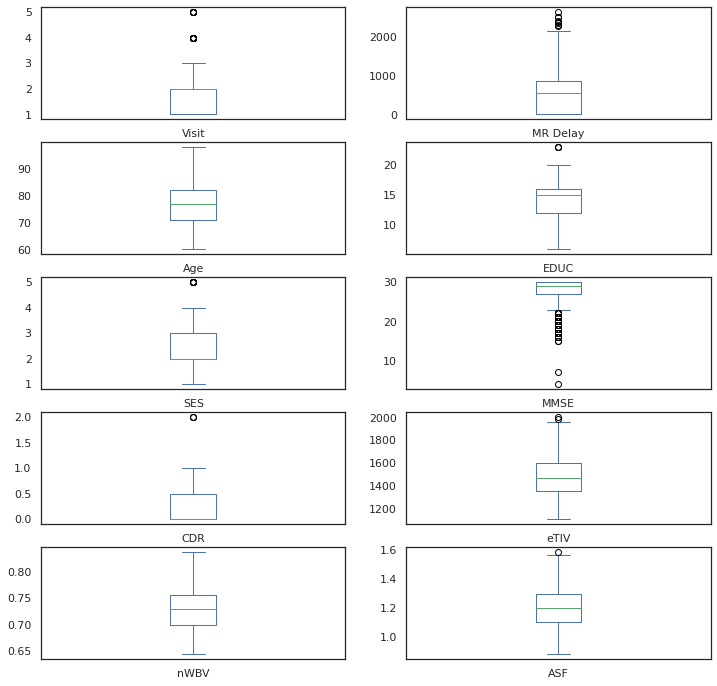

In [103]:
# Avvalendomi dell'esempio in classe, mi accingo a visualizzare i dati e ispezionarli attraverso alcuni tools.

# Creiamo e mostriamo i Diagramma a scatola e baffi
# In statistica il diagramma a scatola e baffi (o diagramma degli estremi e dei quartili[1] o box and whiskers plot o box-plot) è una rappresentazione grafica 
# utilizzata per descrivere la distribuzione di un campione tramite semplici indici di dispersione e di posizione.
# (Diagrammi a scatola e baffi: https://it.wikipedia.org/wiki/Diagramma_a_scatola_e_baffi)

plt.rcParams['figure.figsize'] = (12,12)
Alzheimer.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

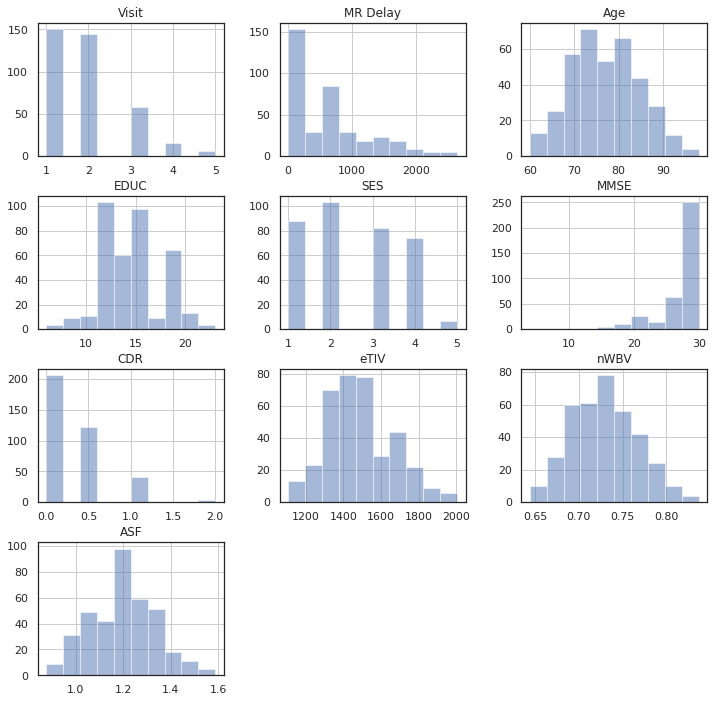

In [104]:
#creaiamo e mostriamo gli istogrammi

Alzheimer.hist(alpha=0.5, figsize=(12, 12))
plt.show()

<Figure size 8640x8640 with 0 Axes>

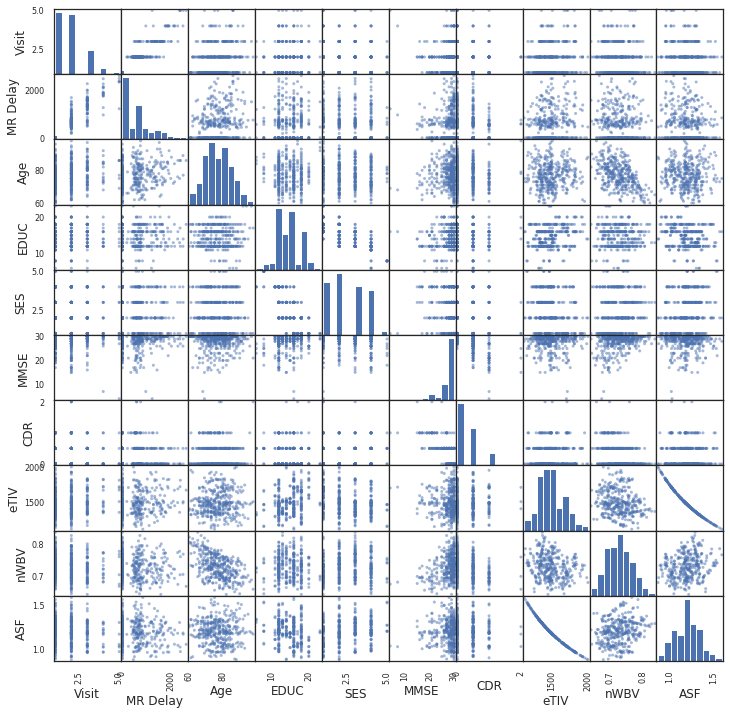

In [105]:
# Creare e mostrare una matrice di dispersione


plt.figure(figsize=(30,30),dpi=288)
scatter_matrix(Alzheimer)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

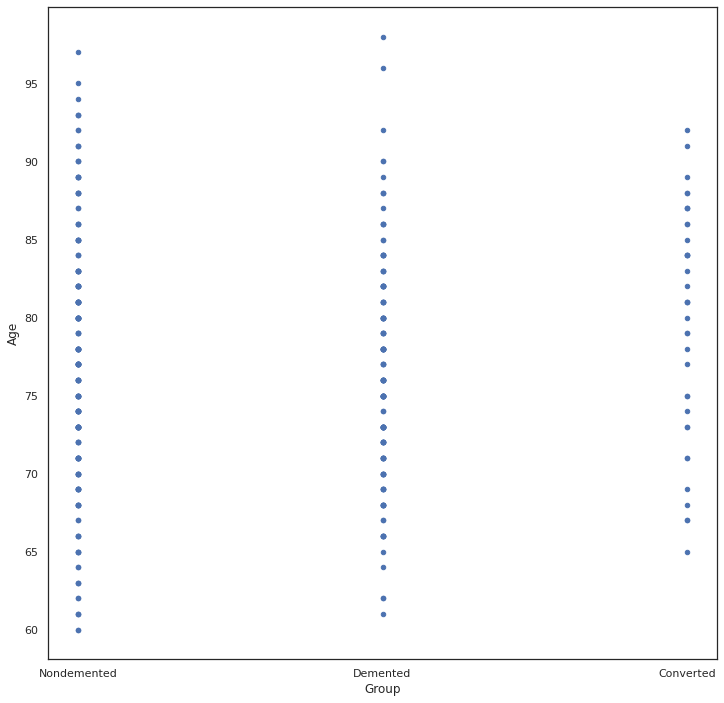

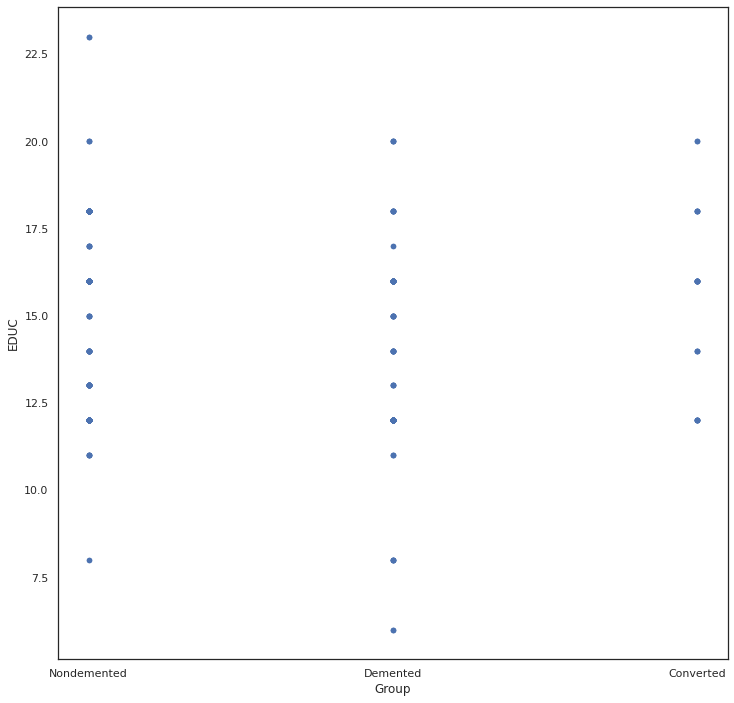

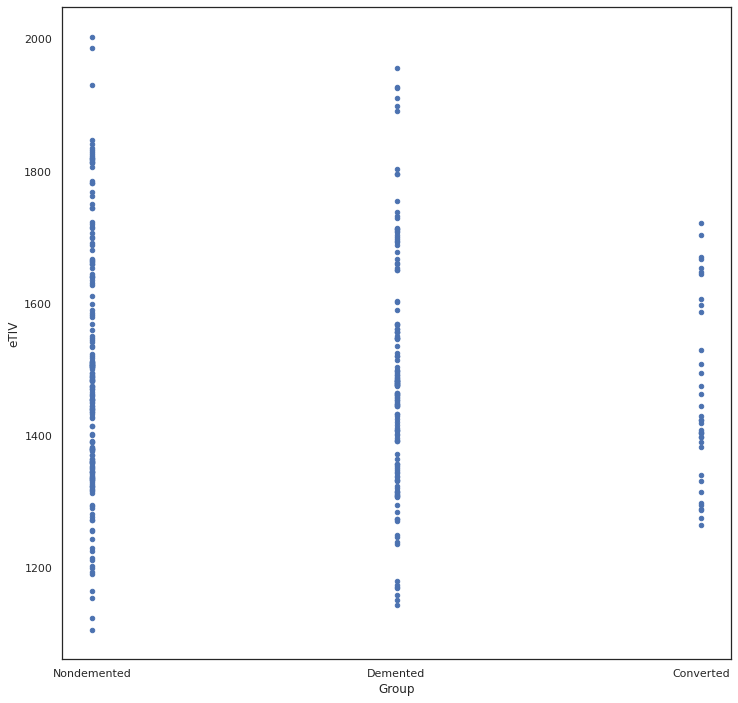

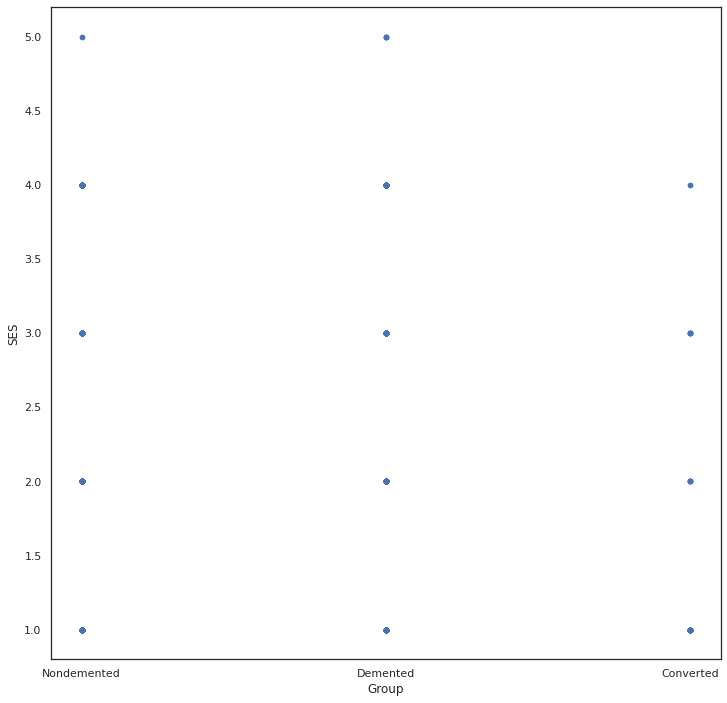

In [106]:
#Utilizzare l'estensione .plot dei dataframe di Pandas per creare un grafico a dispersione 
#delle caratteristiche di Iris. Lo svolgo per più caratteristiche
Alzheimer.plot(kind="scatter", x="Group", y="Age")
Alzheimer.plot(kind="scatter", x="Group", y="EDUC")
Alzheimer.plot(kind="scatter", x="Group", y="eTIV")
Alzheimer.plot(kind="scatter", x="Group", y="SES")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


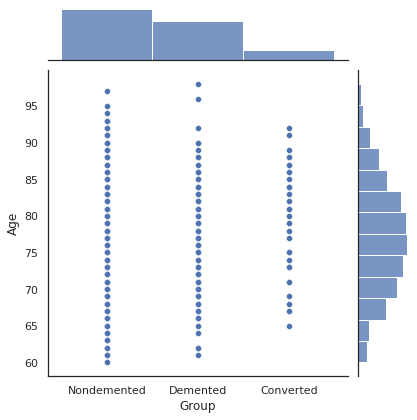

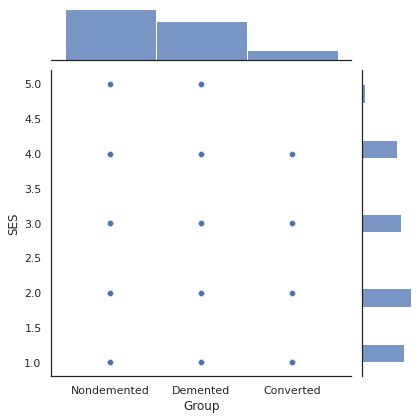

In [107]:
# Utilizzare la libreria seaborn per creare un grafico simile
# Un jointplot di seaborn mostra i diagrammi di dispersione bivariati e gli istogrammi univariati nella stessa figura.
# Decido di usare Group e Age/SES perchè per me i più indicativi

sns.jointplot(x="Group", y="Age", data=Alzheimer, size=6)
sns.jointplot(x="Group", y="SES", data=Alzheimer, size=6)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


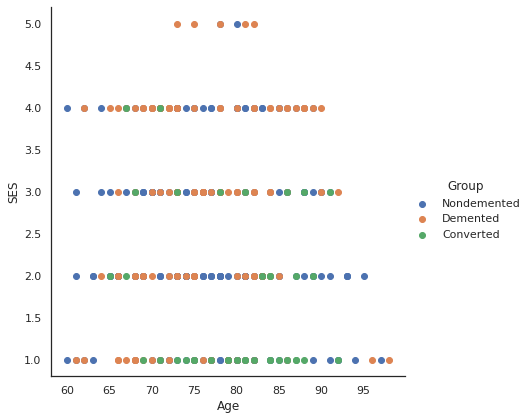

In [108]:
# Usare FacetGrid di seaborn per colorare il diagramma di dispersione

sns.FacetGrid(Alzheimer, hue="Group", size=6) \
   .map(plt.scatter, "Age", "SES") \
   .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


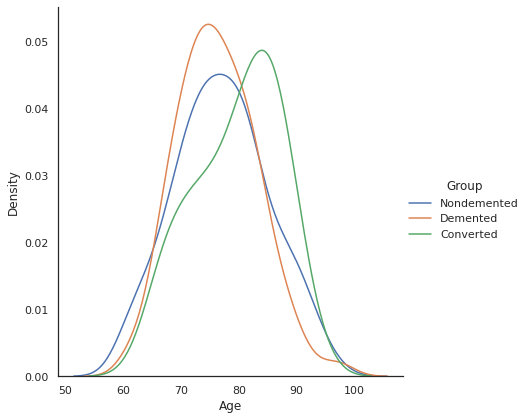

In [109]:
#stima della densità della caratteristica sottostante.
sns.FacetGrid(Alzheimer, hue="Group", size=6) \
   .map(sns.kdeplot, "Age") \
   .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


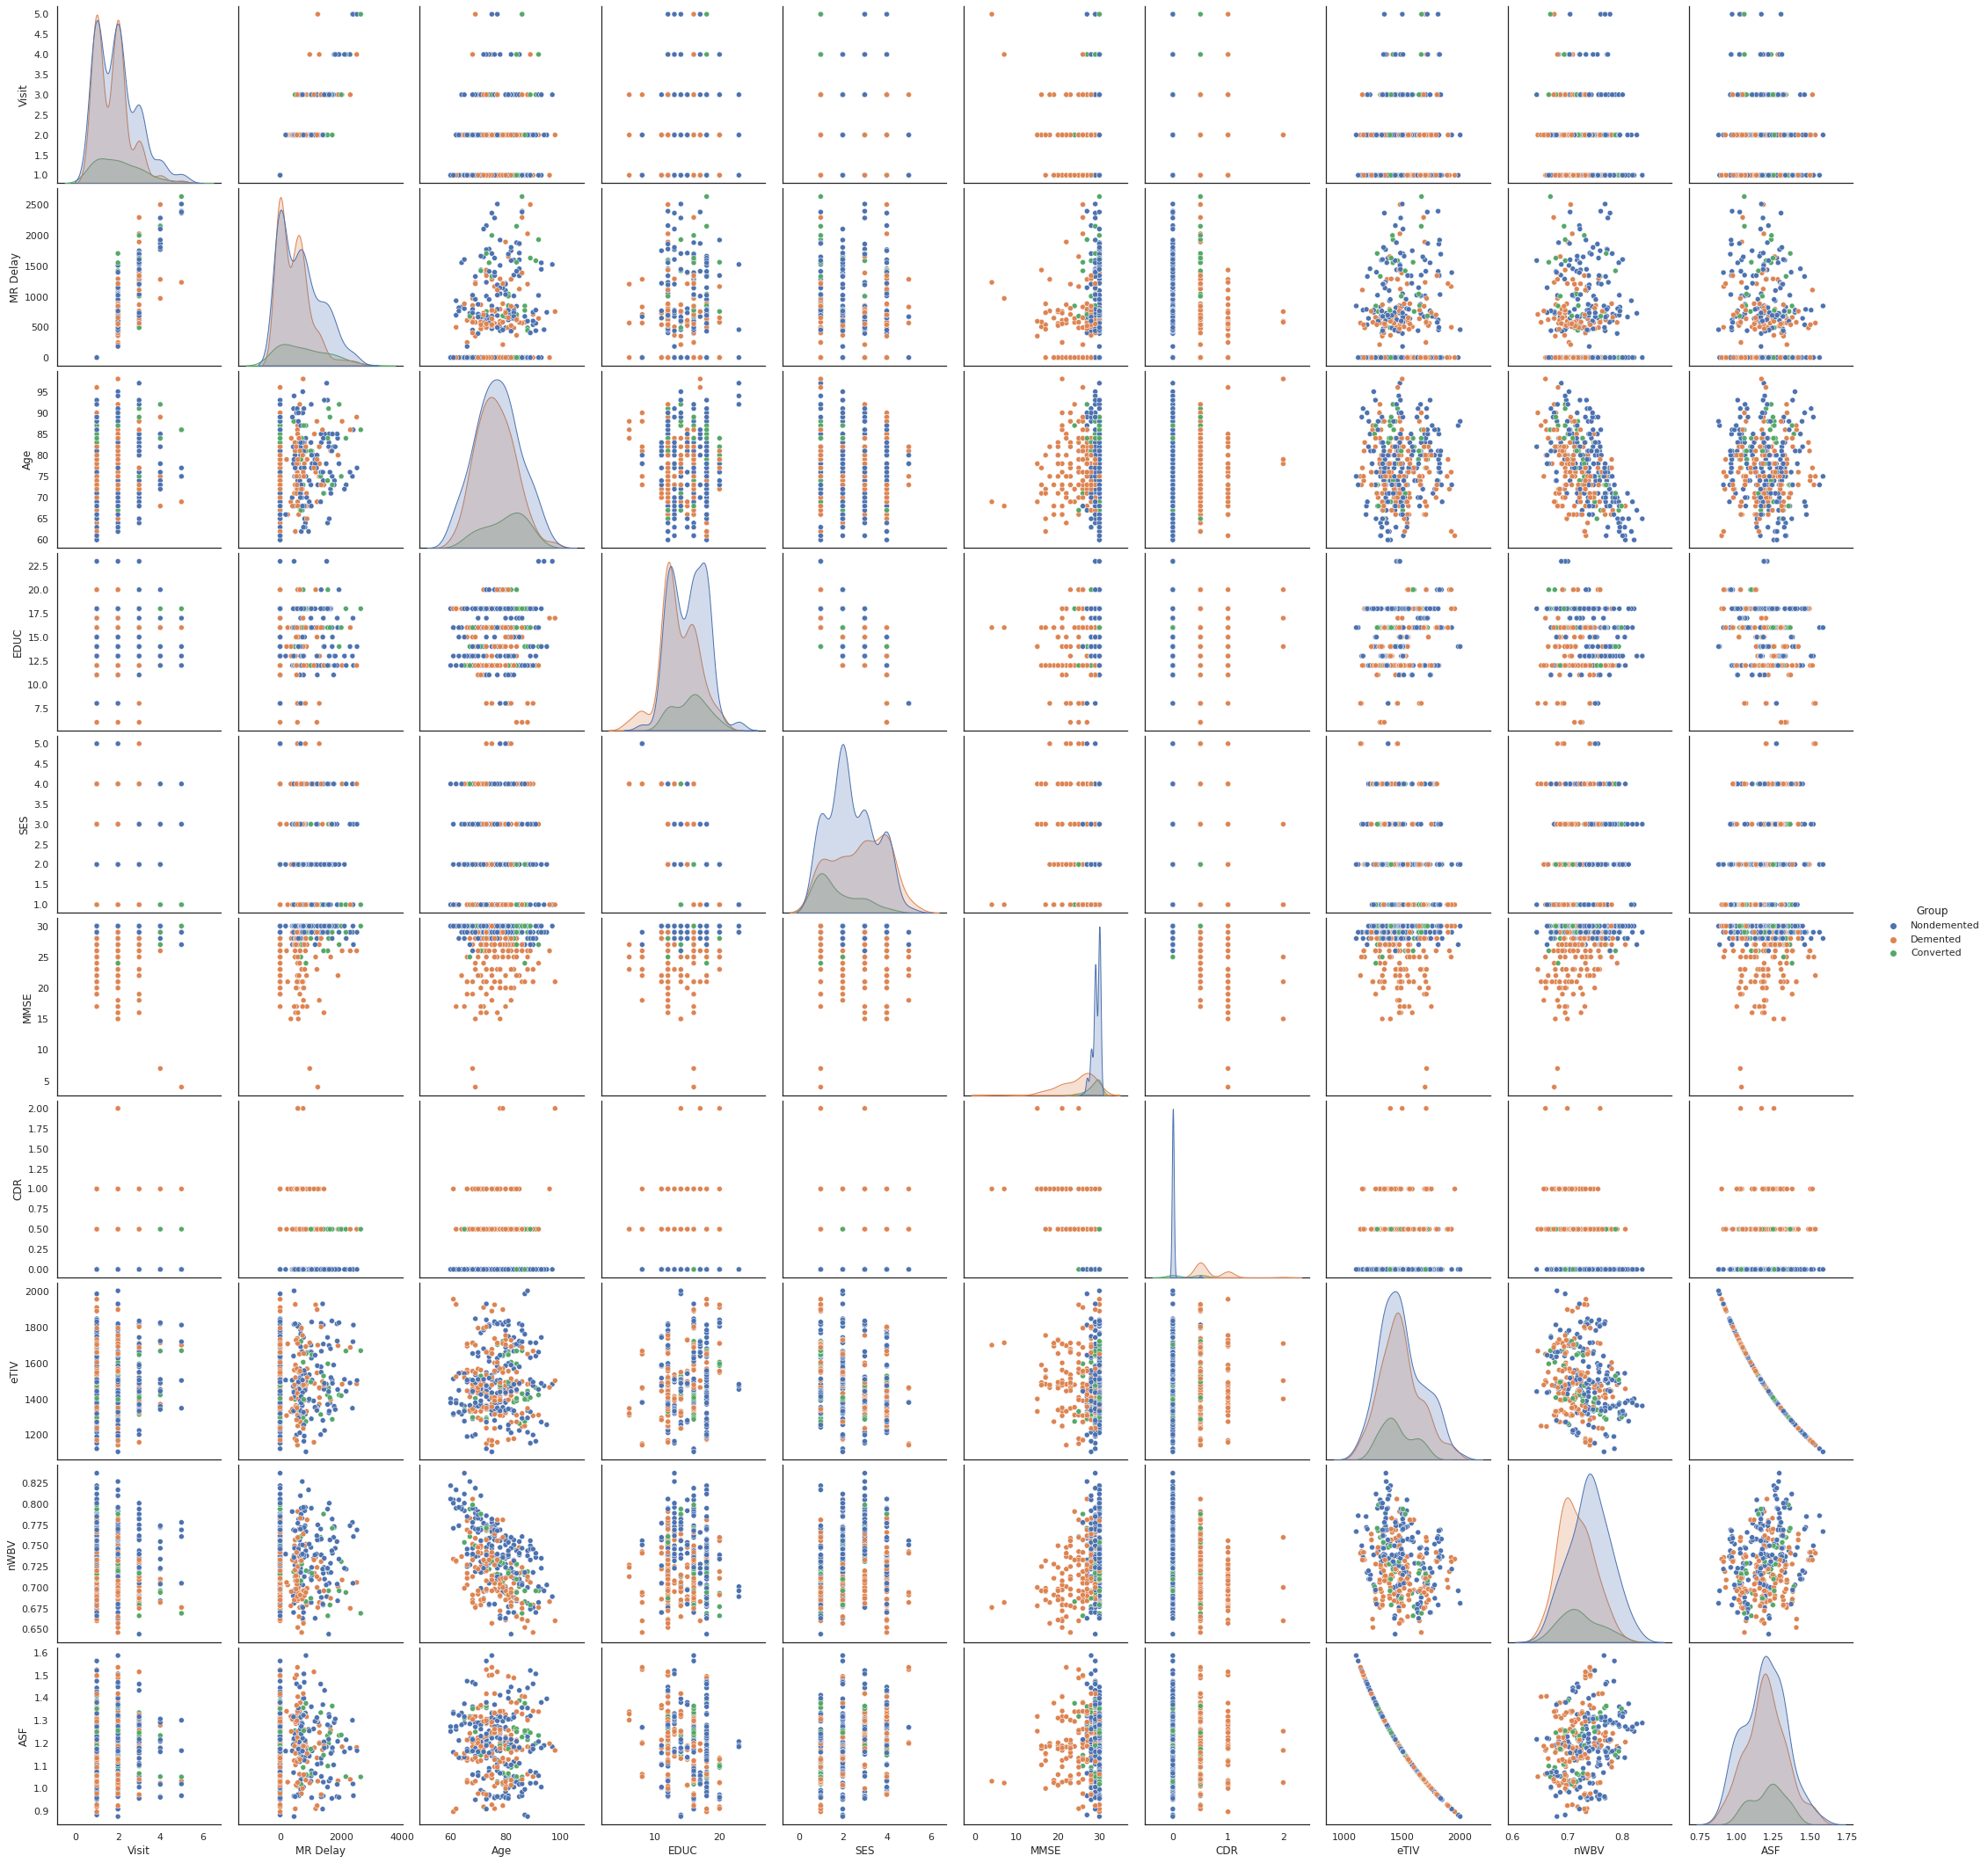

In [110]:
sns.pairplot(Alzheimer, hue="Group", size=3)

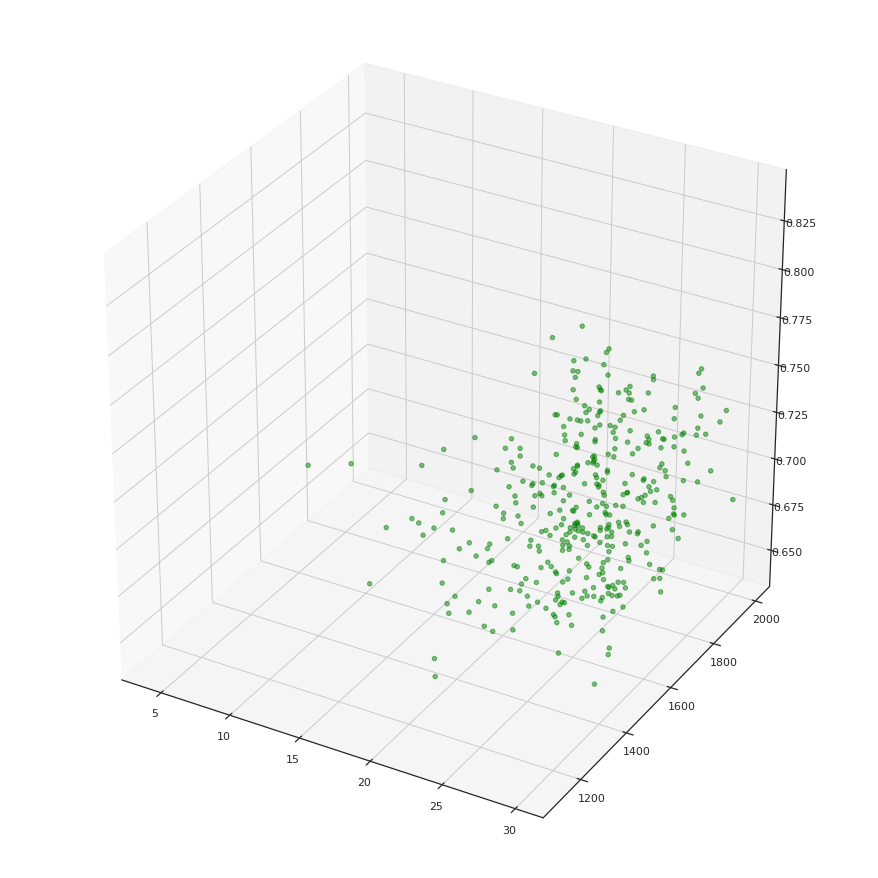

In [111]:
# grafico che ho trovato con l'aiuto di Kaggle 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Alzheimer.MMSE, Alzheimer.eTIV ,Alzheimer.nWBV, c="green", s=20, alpha=0.5) 
plt.show()

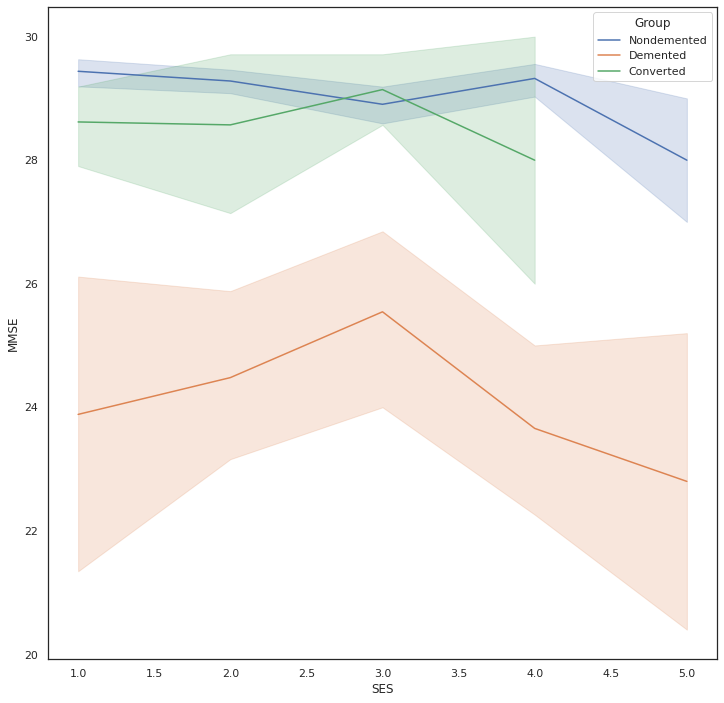

In [112]:
# grafico che ho trovato con l'aiuto di Kaggle 
sns.lineplot(x="SES", y="MMSE",hue="Group", data=Alzheimer)
plt.show()

#Abbiamo fatto un'ispezione visiva dei dati, ora passiamo alla costruzione di un modello

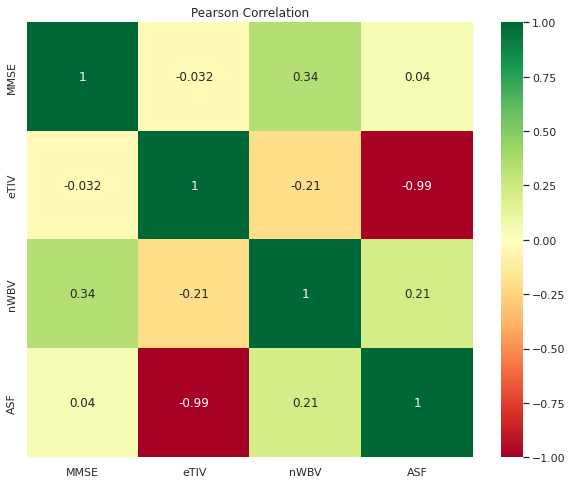

In [113]:
# grafico che ho trovato con l'aiuto di Kaggle 
# in questo caso ci siamo "presi le features" in modo da sezionarle e sceglierle singolarmente
# prima di fare la correlazione
#In statistica, l'indice di correlazione di Pearson (anche detto coefficiente di correlazione lineare[1] 
#o coefficiente di correlazione di Pearson o coefficiente di correlazione di Bravais-Pearson) 
#tra due variabili statistiche è un indice che esprime un'eventuale relazione di linearità tra esse.
#fonte :https://it.wikipedia.org/wiki/Indice_di_correlazione_di_Pearson.

import pandas as pd 
data = Alzheimer.copy() # for VISUALIZATION
data["Group"] = pd.Categorical(data["Group"])
data["Sex"] = pd.Categorical(data["Sex"])
data["SES"] = pd.Categorical(data["SES"])
data["CDR"] = pd.Categorical(data["CDR"])
data["EDUC"] = pd.Categorical(data["EDUC"])
data["Age"] = pd.Categorical(data["Age"])

df = data.select_dtypes(include=["float64","int64","int32"])

Features = ["MMSE","eTIV","nWBV","ASF"]
corrPearson = data[Features].corr(method="pearson")
corrSpearman = data[Features].corr(method="spearman")
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

#Definire le librerie e caricare i dati

In [114]:
#  Define and load everything we need so that this
#  tutorial is complete by itself.

import scipy as sp 
import numpy as np 
import matplotlib as mpl 
import pandas as pd 
import sklearn 

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#  Abilita il plottaggio inline da matplotlib

%matplotlib inline

# Ho notato che provando a compilare ci sono diverse cose che non vanno...
# innanzittutto ho cambiato M/F in Sex in quanto la feature M/F mi dava non pochi prioblemi se dovevo selezionarla. Ho attutato queste trasformazioni: 
# M ->1
# F ->0
# e per quanto riguarda Hand
# R ->1
# L ->0

#Ho inoltre eliminato i valori null e i Nan perchè inficiavano nella realizzazione della predizione

In [115]:
# ripeto il passo di caricamento dei dati più che per utilità quanto più per completezza rispetto all'esempio visto in classe
#link al file csv che ho personalmente caricato su GitHub
csv = "https://raw.githubusercontent.com/manuzioli/Alzheimer/main/oasis_longitudinal.csv"

#Caricamento del csv dalla repo GitHub
Alzheimer2 = pandas.read_csv(csv)
#Sostituisco le stringe con dei numeri in modo che il modello li accetti
Alzheimer2.Hand.replace({"R":1, "L":0},inplace=True)
Alzheimer2.Sex.replace({"M":1, "F":0},inplace=True) 

#controllo valori null
Alzheimer2.isnull().any()


Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
Sex           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [116]:
#Controllo per valori N/A
Alzheimer2.isna().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
Sex           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [117]:
Alzheimer2=Alzheimer2.dropna()

# Come prima, descrivo i dati

In [118]:
print (type(Alzheimer2))
print(Alzheimer2.shape)
print(Alzheimer2.head())

<class 'pandas.core.frame.DataFrame'>
(354, 15)
  Subject ID         MRI ID        Group  Visit  MR Delay  Sex  Hand  Age  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0    1     1   87   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457    1     1   88   
5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0    0     1   88   
6  OAS2_0004  OAS2_0004_MR2  Nondemented      2       538    0     1   90   
7  OAS2_0005  OAS2_0005_MR1  Nondemented      1         0    1     1   80   

   EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0    14  2.0  27.0  0.0  1987  0.696  0.883  
1    14  2.0  30.0  0.0  2004  0.681  0.876  
5    18  3.0  28.0  0.0  1215  0.710  1.444  
6    18  3.0  27.0  0.0  1200  0.718  1.462  
7    12  4.0  28.0  0.0  1689  0.712  1.039  


In [119]:
print(Alzheimer2.describe())

print(Alzheimer2.groupby('Group').size())

            Visit     MR Delay         Sex   Hand         Age        EDUC  \
count  354.000000   354.000000  354.000000  354.0  354.000000  354.000000   
mean     1.884181   601.353107    0.423729    1.0   77.033898   14.703390   
std      0.925330   640.596081    0.494848    0.0    7.811808    2.895662   
min      1.000000     0.000000    0.000000    1.0   60.000000    6.000000   
25%      1.000000     0.000000    0.000000    1.0   71.000000   12.000000   
50%      2.000000   559.500000    0.000000    1.0   77.000000   15.000000   
75%      2.000000   882.500000    1.000000    1.0   82.000000   16.750000   
max      5.000000  2639.000000    1.000000    1.0   98.000000   23.000000   

              SES        MMSE         CDR         eTIV        nWBV         ASF  
count  354.000000  354.000000  354.000000   354.000000  354.000000  354.000000  
mean     2.460452   27.409605    0.271186  1489.991525    0.729879    1.193780  
std      1.134005    3.712626    0.370537   175.768462    0.037

# Preparare per training e validation

In [120]:
#Convertire da un dataframe pandas a un array numpy
#Poichè la maggior parte delle librerie di scikit-learn si aspetta array numpy.
array = Alzheimer2.values
print (type(array))

<class 'numpy.ndarray'>


#Isoliamo il Gruppo 'Demented' 
# DOBBIAMO RISOLVERE UN PROBLEMA! Non possiamo avere M/F e Hand così come sono.
# non possiamo incrociare dati numerici e string M F R L

In [121]:
# Creiamo una distinzione
# tra Group M/F e Hand cambiando omogenizzando i loro dati in numeri 

raw_target = array[:,2]
y = np.where(raw_target == 'Demented', 1, 0)
print (y)

[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0]


#Creare gli array X e y

In [122]:
# Dividere i dati in variabili caratteristiche, X, e variabili target, y
# Le variabili caratteristiche sono nelle ultime dodici colonne -- indici 3,15
# La variabile target è nella colonna 2

# Si noti l'uso di X maiuscolo e y minuscolo.
# Questa è la convenzione utilizzata per distinguere tra matrici, X, 
# e vettori, y, poiché l'espressione che descrive il modello è AX = y.
X = array[:,3:15]




#Controlliamo X (ci aspettiamo 373,12)
print (type(X))
print ('Dimensions of X: ', X.shape)
#Controlliamo y (ci aspettiamo 373,)
print (type(y)) 
print ('Dimensions of y: ', y.shape)


<class 'numpy.ndarray'>
Dimensions of X:  (354, 12)
<class 'numpy.ndarray'>
Dimensions of y:  (354,)


#Dividiamo entrambe X e y in training set e testing set

In [123]:
#Dividiamo entrambe X e y in training set e testing set
# La selezione è fatta in maniera randomica
# Test data è 20% 
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
    
print ('Dimensions of X_train: ', X_train.shape)
print ('Dimensions of X_test:  ', X_test.shape)
print ('Dimensions of y_train: ', y_train.shape)
print ('Dimensions of y_test:  ', y_test.shape)
print ('Head of X_train: \n', X_train[:10])
print ('Head of X_test:  \n', X_test[:10])
print ('Head of y_train: ', y_train[:10])
print ('Head of y_test:  ', y_test[:30])

Dimensions of X_train:  (283, 12)
Dimensions of X_test:   (71, 12)
Dimensions of y_train:  (283,)
Dimensions of y_test:   (71,)
Head of X_train: 
 [[4 1806 0 1 82 13 2.0 30.0 0.0 1342 0.747 1.307]
 [1 0 0 1 72 12 4.0 26.0 0.5 1453 0.777 1.208]
 [1 0 1 1 62 12 4.0 17.0 0.5 1525 0.732 1.151]
 [2 659 0 1 84 12 4.0 26.0 0.5 1273 0.686 1.378]
 [3 687 0 1 71 16 3.0 30.0 0.0 1503 0.788 1.168]
 [1 0 1 1 82 12 4.0 27.0 0.5 1477 0.729 1.188]
 [1 0 1 1 68 18 1.0 30.0 0.0 1654 0.747 1.061]
 [2 754 0 1 98 17 1.0 21.0 2.0 1503 0.66 1.168]
 [1 0 1 1 89 16 1.0 28.0 0.0 1631 0.674 1.076]
 [1 0 1 1 73 18 2.0 29.0 0.0 1548 0.773 1.134]]
Head of X_test:  
 [[1 0 0 1 71 18 2.0 30.0 0.0 1371 0.769 1.28]
 [5 2369 0 1 75 13 4.0 29.0 0.0 1349 0.778 1.301]
 [1 0 0 1 72 16 3.0 24.0 0.5 1354 0.733 1.296]
 [2 491 0 1 73 12 4.0 26.0 0.5 1451 0.757 1.21]
 [2 493 1 1 77 16 3.0 30.0 0.0 1820 0.768 0.964]
 [2 736 1 1 80 12 3.0 17.0 1.0 1755 0.696 1.0]
 [1 0 0 1 81 13 2.0 29.0 0.0 1345 0.737 1.305]
 [1 0 1 1 74 18 2.0 2

In [124]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print ('                        Predicted')
print ('                   Positive','Negative')
print ('Actually Positive (1): ', cm[1,1], '    ', cm[1,0])
print ('Actually Negative (0): ', cm[0,1], '    ', cm[0,0])



                        Predicted
                   Positive Negative
Actually Positive (1):  21      3
Actually Negative (0):  7      40


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [125]:
#Calcoliamo adesso la precision,accuracy and recall
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.875


In [126]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.750


In [127]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.859
